In [5]:
# 1. Data Preparation:
import pandas as pd
df = pd.read_csv('heart_disease.csv')
df 

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [6]:
# 2. Exploratory Data Analysis (EDA):
# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64
              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


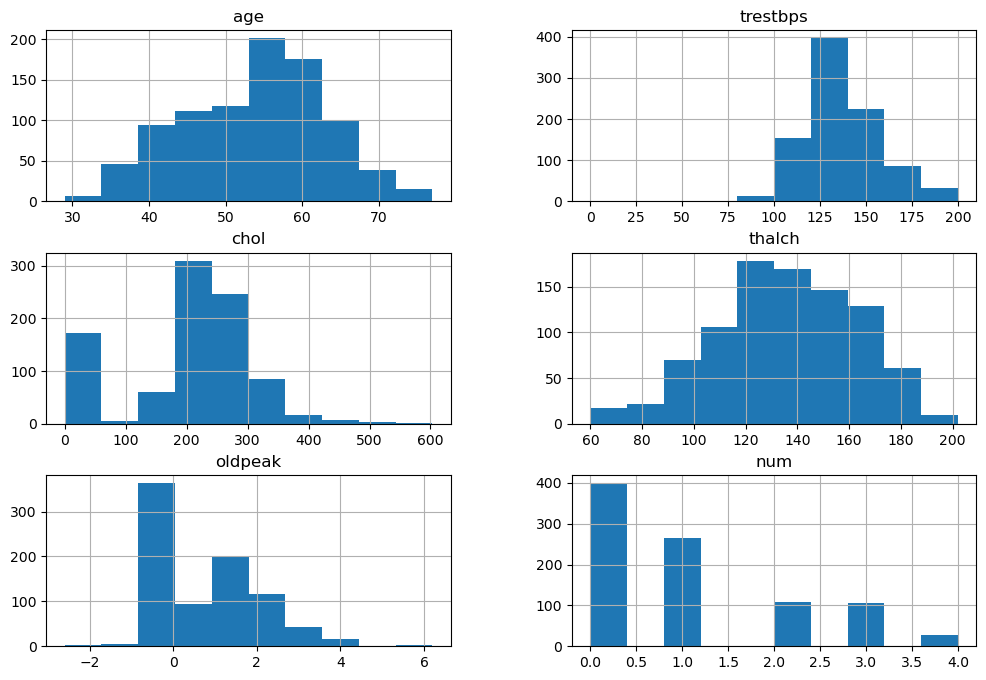

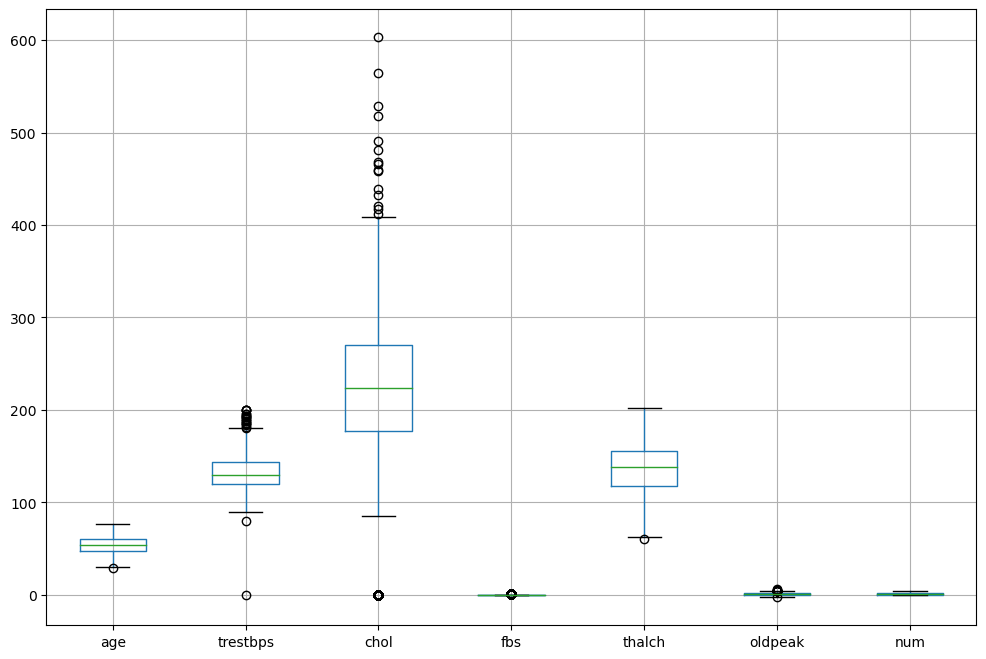

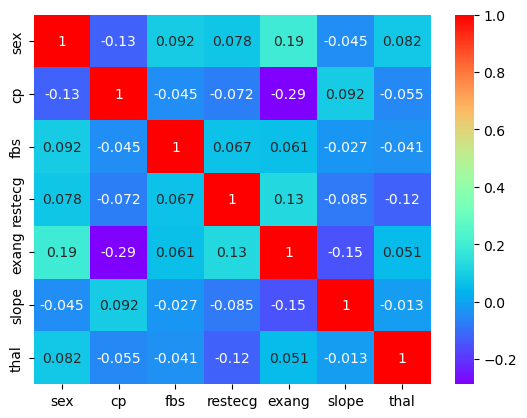

In [9]:
# Visualize the distribution of features, including histograms, box plots, and correlation matrices.
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
df.hist(figsize=(12, 8))
plt.show()

# Box plots for numerical features
df.boxplot(figsize=(12, 8))
plt.show()

# Correlation matrix
corr_matrix = X_cate.corr()
sns.heatmap(corr_matrix, annot=True, cmap='rainbow')
plt.show() 

In [7]:
# 3. Feature Engineering:
# Label encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
X_cate = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']]

X_cate['sex']=LE.fit_transform(X_cate['sex'])
X_cate['cp']=LE.fit_transform(X_cate['cp'])
X_cate['fbs']=LE.fit_transform(X_cate['fbs'])
X_cate['restecg']=LE.fit_transform(X_cate['restecg'])
X_cate['exang']=LE.fit_transform(X_cate['exang'])
X_cate['slope']=LE.fit_transform(X_cate['slope'])
X_cate['thal']=LE.fit_transform(X_cate['thal'])

X_cate.head() 

C:\Users\syedu\AppData\Local\Temp\ipykernel_47740\2969390134.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cate['sex']=LE.fit_transform(X_cate['sex'])
C:\Users\syedu\AppData\Local\Temp\ipykernel_47740\2969390134.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cate['cp']=LE.fit_transform(X_cate['cp'])
C:\Users\syedu\AppData\Local\Temp\ipykernel_47740\2969390134.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,sex,cp,fbs,restecg,exang,slope,thal
0,1,3,1,0,0,0,0
1,1,1,0,1,0,1,0
2,1,0,0,1,0,1,0
3,1,3,0,0,0,1,0
4,1,0,0,1,1,1,0


In [8]:
# Standard Scaling
X_cont = df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']]

from sklearn.preprocessing import StandardScaler 

SS = StandardScaler()
X_cont_SS = SS.fit_transform(X_cont)
X_cont_SS = pd.DataFrame(X_cont_SS)
X_cont_SS.columns = list(X_cont)
X_cont_SS.head()

,age,trestbps,chol,thalch,oldpeak,num
0,1.006027,0.567394,0.281297,0.524183,1.288612,-0.881977
1,-1.397560,0.076967,0.013526,-0.147705,-0.815249,-0.881977
2,0.350503,0.322181,-0.084656,0.449529,-0.449360,-0.881977
3,-0.195767,-0.756760,-0.138211,2.017268,-0.815249,-0.881977
4,0.350503,-1.149102,-0.004325,-0.371668,0.556834,-0.881977


In [21]:
# Check for missing values
df_dropped = df.dropna()

# Impute missing values with the mean (for numerical features)
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak','num']
for col in numerical_cols:
  df[col] = df[col].fillna(df[col].mean())

# Impute missing values with the mode (for categorical features)
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'] 
for col in categorical_cols:
  df[col] = df[col].fillna(df[col].mode()[0])

print(df_dropped.isnull().sum())
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


In [47]:
# Concatenation
X = pd.concat([X_cont_SS, X_cate], axis=1)
print(X.shape)

Y = X['exang']
print(Y.shape)

(908, 13)
(908,)


In [48]:
# 4. Decision Tree Classification:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [49]:
# Implement a Decision Tree Classification model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)
y_pred = pd.DataFrame(y_pred)
y_pred.value_counts() 

0
0    106
1     76
Name: count, dtype: int64

In [50]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC-AUC: 1.0


In [19]:
# 5. Hyperparameter Tuning:
# Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

# Evaluate the best model's performance
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

print("Best Model Performance:")
print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)
print("F1-score:", f1_best)
print("ROC-AUC:", roc_auc_best)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Best Model Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC-AUC: 1.0


In [20]:
# 6. Model Evaluation and Analysis:
# Analyze the performance of the Decision Tree model

# Interpretation of Evaluation Metrics:

# - Accuracy: The overall proportion of correctly classified instances (both positive and negative).
# - Precision: It measures how well the model avoids false positives.
# - Recall: It measures how well the model captures all the positive instances.
# - F1-score: The harmonic mean of precision and recall, providing a balanced evaluation when there is an uneven class distribution.
# - ROC-AUC: The area under the Receiver Operating Characteristic curve, measuring the model's ability to distinguish between positive and negative classes.

# Based on the obtained metrics, you can assess how well the Decision Tree model performs on the given task.
# Compare these metrics with the initial model's performance (before hyperparameter tuning) to see the improvement achieved.

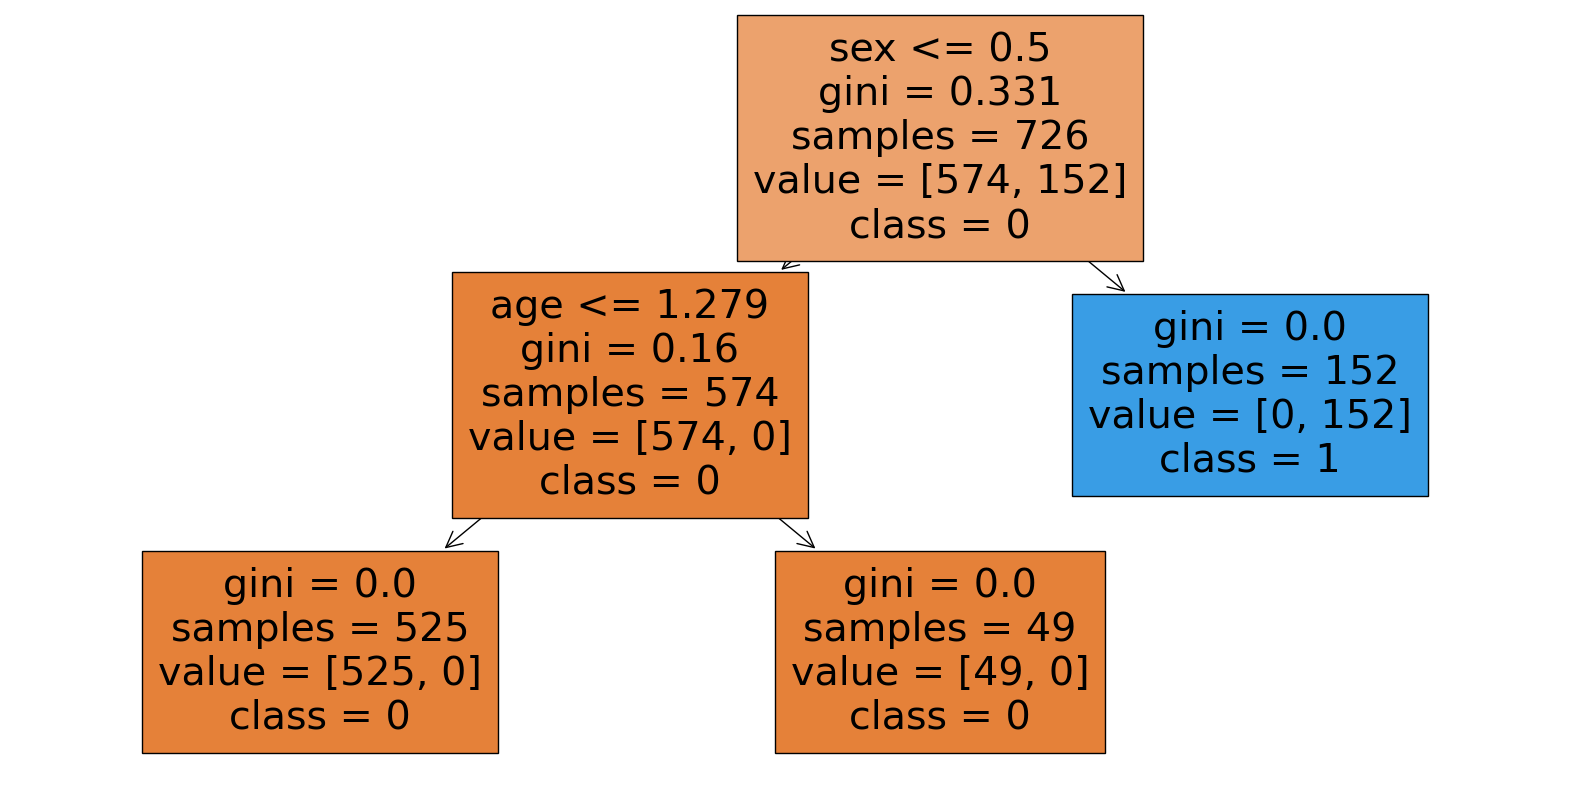

In [33]:
# Visualize the decision tree structure
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

feature_names = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal','num']

plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names = feature_names, class_names = ['0', '1'], filled=True)
plt.show()

In [34]:
# Interpretation of Decision Tree Visualization:

# - Each node represents a decision based on a feature.
# - The top node is the root node, and the tree branches down to leaf nodes representing the final predictions.
# - The color of the nodes indicates the majority class at that node.
# - The size of the nodes represents the number of samples at that node.

# By examining the decision tree, you can:

# - Understand the rules learned by the model.
# - Gain insights into the data: Observe how different feature values influence the predicted outcome.